<a href="https://colab.research.google.com/github/kusuma687/AIAC/blob/main/2403A52096_NLP_ASSIGNMENT_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activities:

o Load abstracts from one research category.

o Clean text (remove numbers, punctuation).

o Compute TF-IDF for all abstracts.

o Identify:

o Top 20 terms across the corpus

o Visualize:

o Word cloud using TF-IDF weights

o Heatmap of TF-IDF scores for top 10 terms across 5
documents

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Step 1: Load Dataset**

In [3]:
df = pd.read_csv('/content/arxiv_data.csv')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


**Step 2: Select One Research Category**

In [5]:
df_cs = df[df['terms'].str.contains('cs', case=False, na=False)]
df_cs = df_cs[['summaries']].dropna()
df_cs = df_cs.sample(5, random_state=42)  # using 5 documents for heatmap
df_cs

,summaries
14247,The diurnal cycle of tropical cyclones (TCs) i...
7491,Learning visual features from unlabeled image ...
37377,"Federated Learning (FL), Split Learning (SL), ..."
21238,We study the online learning with feedback gra...
16877,While great progress has been made recently in...


**Step 3: Text Cleaning**

In [6]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)          # remove numbers
    text = re.sub(r'[^\w\s]', '', text)      # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df_cs['cleaned_summaries'] = df_cs['summaries'].apply(clean_text)
df_cs['cleaned_summaries']

,cleaned_summaries
14247,diurnal cycle tropical cyclones tcs daily cycl...
7491,learning visual features unlabeled image data ...
37377,federated learning fl split learning sl splitf...
21238,study online learning feedback graphs framewor...
16877,great progress made recently automatic image m...


**Step 4: Compute TF-IDF**

In [8]:
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_cs['cleaned_summaries'])

feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

tfidf_df.head()

,ability,able,accuracy,achieve,achieved,achieves,actions,adjusts,adversarial,afternoon,...,warming,way,weak,weaker,wide,widely,without,work,yet,zimmert
0,0.052009,0.052009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064464,...,0.064464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.055356,0.000000,0.000000,0.068613,0.000000,0.000000,0.068613,0.000000,0.000000,...,0.000000,0.137226,0.000000,0.068613,0.000000,0.000000,0.000000,0.000000,0.068613,0.000000
2,0.043082,0.000000,0.053398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053398,0.053398,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.095714,0.095714,0.000000,0.154443,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095714
4,0.000000,0.000000,0.000000,0.095382,0.000000,0.000000,0.000000,0.000000,0.076953,0.000000,...,0.000000,0.000000,0.095382,0.000000,0.095382,0.000000,0.000000,0.095382,0.000000,0.000000


**Step 5: Top 20 Terms Across Corpus**

In [9]:
top_terms = tfidf_df.sum(axis=0).sort_values(ascending=False).head(20)
top_terms

,0
learning,0.513618
model,0.459800
cycle,0.451250
diurnal,0.386785
image,0.365249
puzzles,0.343064
sfl,0.320391
clientside,0.320391
using,0.309935
stochastic,0.287142


**Step 6: Word Cloud Using TF-IDF Weights**

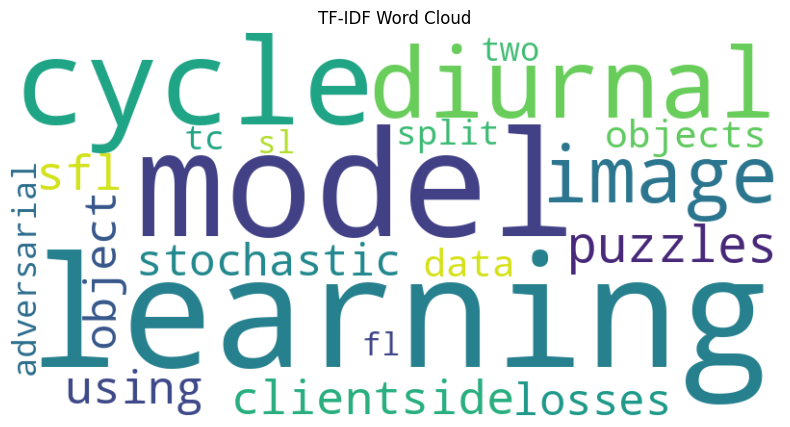

In [10]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_terms)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud')
plt.show()

**Step 7: Heatmap of TF-IDF Scores**

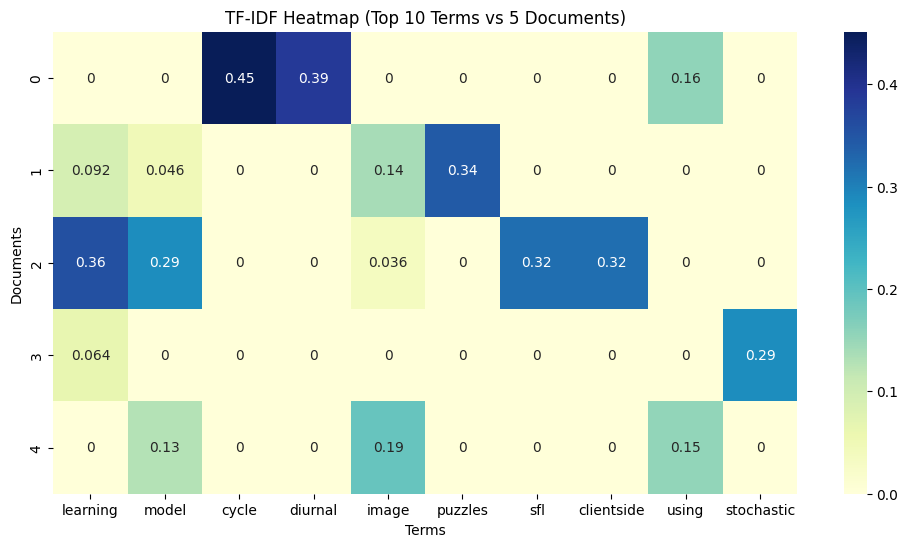

In [11]:
top_10_terms = top_terms.head(10).index
heatmap_data = tfidf_df[top_10_terms]

plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='YlGnBu'
)
plt.title('TF-IDF Heatmap (Top 10 Terms vs 5 Documents)')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

**Discussion**

The TF-IDF analysis highlights domain-specific terminology that frequently appears in research abstracts while reducing the importance of common words. The word cloud clearly emphasizes the most influential technical terms, providing an intuitive understanding of the research focus.
The heatmap visualization demonstrates how term importance varies across different documents,showing that certain terms dominate specific abstracts.This confirms that TF-IDF effectively captures contextual relevance rather than raw frequency.

Overall, TF-IDF proves to be a powerful technique for analyzing and summarizing large collections of academic text.